In [1]:
%cd /content/drive/MyDrive/Git_Project/Amazon Product Reviews

/content/drive/MyDrive/Git_Project/Amazon Product Reviews


In [2]:
!pwd

/content/drive/MyDrive/Git_Project/Amazon Product Reviews


In [ ]:
# Data --> https://drive.google.com/file/d/19IfwqctIzeL75fxKNXfX58vvQKB1QFF_/view?usp=sharing


# EDA Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
electronics_data = pd.read_csv("ratings_Electronics (1).csv"
,names=['userId', 'productId','Rating','timestamp'])

In [5]:
electronics_data

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [6]:
# take just 1048576 row
electronics_data = electronics_data.iloc[:1048576].drop(columns=['timestamp'])

In [7]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
dtypes: float64(1), object(2)
memory usage: 24.0+ MB


In [8]:
print('Minimum rating is: ' ,(electronics_data.Rating.min()))
print('Maximum rating is: ' ,(electronics_data.Rating.max()))

print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0]) # shape 0 = row, 1 = column
print("Total No of Users   :", len(electronics_data['userId'].unique()))
print("Total No of products  :", len(electronics_data['productId'].unique()))

Minimum rating is:  1.0
Maximum rating is:  5.0
Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


In [9]:
# check missing value
electronics_data.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b2eed7b10>]],
      dtype=object)

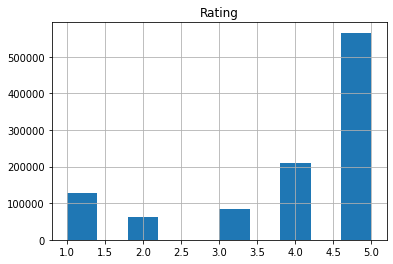

In [10]:
electronics_data[['Rating']].hist()

In [11]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user

userId
A5JLAU2ARJ0BO            412
A231WM2Z2JL0U3           249
A25HBO5V8S8SEA           164
A6FIAB28IS79             146
AT6CZDCP4TRGA            128
                        ... 
A3EEW1G63825UL             1
A3EEVD827ZC4JY             1
A3EEUZUBZQ4N4D             1
A3EEUT0F9898GS             1
A00037441I8XOQJSUWCAG      1
Name: Rating, Length: 786330, dtype: int64

In [12]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

In [13]:
no_of_user_voted = electronics_data[['userId', 'Rating']].groupby(by='userId').count().sort_values(by = 'Rating', ascending=False).reset_index()
no_of_user_voted

,userId,Rating
0,A5JLAU2ARJ0BO,412
1,A231WM2Z2JL0U3,249
2,A25HBO5V8S8SEA,164
3,A6FIAB28IS79,146
4,AT6CZDCP4TRGA,128
...,...,...
786325,A2DLCB8GU5E3YU,1
786326,A2DLCBR62GHUNV,1
786327,A2DLCKIT568DD2,1
786328,A2DLCVS7U8OB92,1


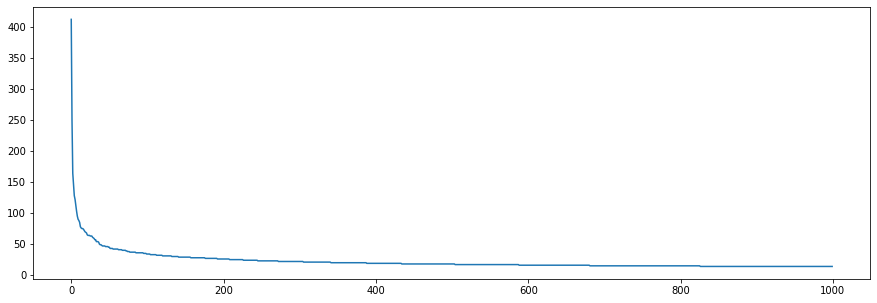

In [14]:
import matplotlib.pyplot as plt

# x = electronics_data['userId']
fig, ax = plt.subplots(figsize=(15,5))

y = no_of_user_voted['Rating'].values

plt.plot(y[:1000])
plt.show()

In [15]:
no_of_product_voted = electronics_data[['productId', 'Rating']].groupby(by='productId').count().sort_values(by = 'Rating', ascending=False).reset_index()
no_of_product_voted

,productId,Rating
0,B0002L5R78,9487
1,B0001FTVEK,5345
2,B000I68BD4,4903
3,B000BQ7GW8,4275
4,B00007E7JU,3523
...,...,...
61889,B00009UT62,1
61890,B00009UT6A,1
61891,B000ARISWK,1
61892,B000ARHONE,1


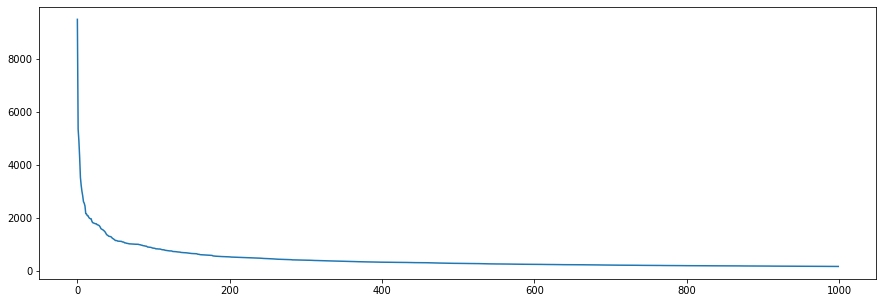

In [16]:
y = no_of_product_voted['Rating'].values
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(y[:1000])
plt.show()

# Popularity Based Recommendation

In [17]:

# drop product that less than 50 voted/ drop product ที่มีผลโหวตรวมน้อยกว่า 50 ครั้ง
new_df = electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
new_df

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5.0
1048572,A1C2OANTC49AQI,B000IF51UQ,5.0
1048573,A2JL0387FDDFS,B000IF51UQ,5.0
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4.0


In [40]:
len(new_df['productId'].unique())

3813

In [75]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [80]:
ratings_mean_count['rating_counts'].max()

print('Minimum rating is: ' ,ratings_mean_count['rating_counts'].min())
print('Maximum rating is: ' ,ratings_mean_count['rating_counts'].max())

Minimum rating is:  50
Maximum rating is:  9487


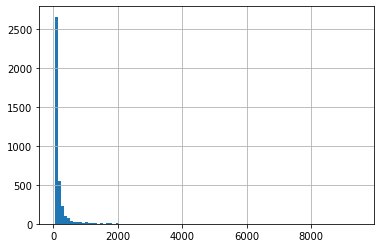

In [84]:
ratings_mean_count['rating_counts'].hist(bins = 100)

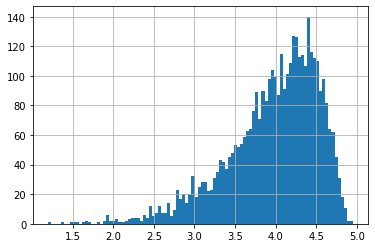

In [86]:
ratings_mean_count['Rating'].hist(bins = 100)

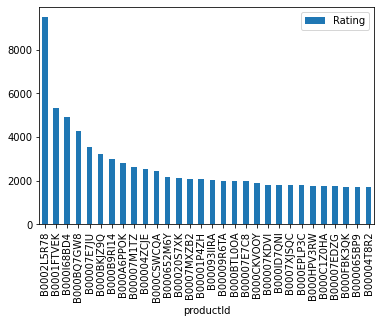

In [87]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")
# The answer is most quantities voted [not most Ranking]

# Model-based collaborative filtering system

In [26]:
ratings_matrix = new_df[:20000].pivot_table(values='Rating', columns='userId', index='productId', fill_value=0)
ratings_matrix.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A07730732C0MK8X9APP6C,A0821988FXKFYX53V4QG,A08523431UFFNYIQR59LY,A099626739FNCRNHIKBCG,A1003EYWAQFOUG,A1008Z48LB2QI4,A100LLXMXDZHJZ,A100R120QT9E2M,A100SER4Z9YAWR,A100WO06OQR8BQ,A10121433FMMZNY18RWZ8,A1013OEQCVS6AR,A1013Q8NLCY56R,A101DJDPGK0Q46,A101IWCCIWQWC9,A101N04POEB9CL,A1025SYFKSMERB,A1027EV8A9PV1O,A10285OSAM1MZK,A1028F2JVII4S7,A1028XZRNI0NRP,A102EC3XGCBZ81,A102IUFPXVDRB6,A102L0RVI4LHH3,A102NXMIVU82AK,A102RLOGIBBDMW,A102SDBNUQ6W72,A102ZABPUPNYCT,A1038957GWRBP375RU5T,A103MTOZ2Z6FOB,A103XY7DJYZHFN,A104F83PVACKQF,...,AZQ9DYG38GVBR,AZQJQBJ75DHMS,AZQOWHUHXMIMS,AZQQVI9RHJYH6,AZQTJ6HUS5L2Q,AZRJH4JFB59VC,AZRPGTU8A7KD5,AZRR55GM4Y9NK,AZS8W54PXQ01W,AZSH7IFNZR62F,AZSKORJRCSQ38,AZSUNAT0BRQDU,AZTAC5WZ4QDRN,AZTC7YC8PKG39,AZTC8ZV20NO1D,AZTJJ7AGB88YZ,AZTPP57BPF0W7,AZTZ61W23JET0,AZUUV3DEO6Z4J,AZV6J8966E8IE,AZV8YD0X0F5Z3,AZV9WA9MNT0FB,AZVL57D2NG3T1,AZVRZHRWM2OVA,AZW8H05DVPSGS,AZWHN4ENMEZLI,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX2RDN9YXZAE,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXCV0SD51HI9,AZXKUK895VGSM,AZXP46IB63PU8,AZXWUZ9PPSOTL,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZP8BC9WE0N8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1400532620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
ratings_matrix.shape

(115, 19578)

In [28]:
#Feature reduction
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_matrix)
decomposed_matrix.shape

(115, 10)

In [48]:
# correlation_matrix = np.corrcoef(decomposed_matrix) #corr from row not column
# correlation_matrix.shape

correlation_matrix = pd.DataFrame(data = decomposed_matrix).T.corr()
correlation_matrix.shape

(115, 115)

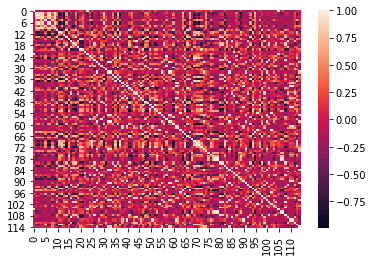

In [32]:
import seaborn as sns
sns.heatmap(correlation_matrix)

Model-based ==> Predict

In [50]:
# if but item in index 2
ratings_matrix.index[2]

'1400501520'

In [51]:
i = "1400501520"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

2

In [52]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(115,)

In [54]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend
# next product suggestion to buy is below

['1400501466',
 '1400501776',
 '1400532620',
 '140053271X',
 '1400532736',
 '1400698987',
 'B00000J08Q',
 'B00000J1EQ',
 'B00000JHWX']

# memory-based: Collaberative filtering (Item-Item recommedation)

In [ ]:
# Use KNN for predict similarity product

In [ ]:
# Theory --> https://medium.com/@sinart.t/recommendation-system-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%AA%E0%B8%A3%E0%B8%B8%E0%B8%9B%E0%B9%80%E0%B8%AD%E0%B8%B2%E0%B9%80%E0%B8%AD%E0%B8%87-ce6246f49754
# Notebook Ref -- > https://www.kaggle.com/saurav9786/recommender-system-using-amazon-reviews#Popularity-Based-Recommendation